In [1]:
#https://drive.google.com/file/d/1iw5zukRiMLMEhT2CTmxbwDqWf4xqnadb/view?usp=sharing

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

In [4]:
import tensorflow as tf

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Masking
from numpy import random
from random import sample

In [7]:
txtlist =[]
with open('4700hw2_names.txt','r') as f:
    for line in f:
        txtlist.append(line.split(',')[0])
namelist_sample = sample(txtlist, 5000)

namelist_lower = []
for name in namelist_sample:
    if name.isalpha()==True:
        namelist_lower.append(name.lower())

print(len(namelist_lower))

5000


In [8]:
def word_to_vec(L):
    r = []
    for w in L:
        n = len(w)
        t = np.zeros((n,28))
        for i, l in enumerate(w):
            if l==' ':
                t[i]=0
            elif l=='#':
                t[i,26]=1
            elif l=='$':
                t[i,27]=1
            else:
                j = ord(l)-97
                t[i, j] = 1
        r.append(t)
    return r

In [9]:
def create_model(max_len):
    model = Sequential()
    model.add(Masking(mask_value=np.zeros(28)))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dense(28, activation='softmax'))
    return model
   
    

In [10]:
length = []
for name in namelist_lower:
    length.append(len(name))
max_length = max(length)

x=[]
y=[]
for name in namelist_lower:
    name_x='#'+name
    name_y=name+'$'
    x.append(name_x)
    y.append(name_y)

print(len(x))
print(len(y))
max_length+=1

x_pad=[]    
y_pad=[]
for name in x:
    if len(name)<max_length:
        name_padx=name+' '*(max_length-len(name))
    x_pad.append(name_padx)
for name in y:
    if len(name)<max_length+1:
        name_pady=name+' '*(max_length-len(name))
    y_pad.append(name_pady)

print(len(x_pad))
print(len(y_pad))

x_train = word_to_vec(x_pad)
y_train = word_to_vec(y_pad)

x_train = numpy.asarray(x_train)
y_train = numpy.asarray(y_train)


print(x_train.shape)
print(y_train.shape)
print(max_length)

5000
5000
5000
5000
(5000, 15, 28)
(5000, 15, 28)
15


Train on 5000 samples
Epoch 1/200
5000/5000 [==============================] - 4s 833us/sample - loss: 1.3019 - accuracy: 0.2342
Epoch 2/200
5000/5000 [==============================] - 1s 118us/sample - loss: 1.1842 - accuracy: 0.2712
Epoch 3/200
5000/5000 [==============================] - 1s 118us/sample - loss: 1.1293 - accuracy: 0.2876
Epoch 4/200
5000/5000 [==============================] - 1s 118us/sample - loss: 1.0998 - accuracy: 0.2946
Epoch 5/200
5000/5000 [==============================] - 1s 119us/sample - loss: 1.0804 - accuracy: 0.3034
Epoch 6/200
5000/5000 [==============================] - 1s 118us/sample - loss: 1.0666 - accuracy: 0.3074
Epoch 7/200
5000/5000 [==============================] - 1s 118us/sample - loss: 1.0567 - accuracy: 0.3126
Epoch 8/200
5000/5000 [==============================] - 1s 119us/sample - loss: 1.0473 - accuracy: 0.3144
Epoch 9/200
5000/5000 [==============================] - 1s 118us/sample - loss: 1.0388 - accuracy: 0.3186
Epoch 10/200
50

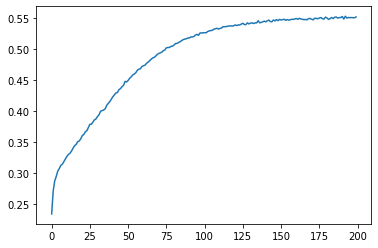

In [11]:
model_1 = create_model(max_length)
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_1.fit(x_train, y_train, batch_size=32, epochs=200)

plt.plot(history.history['accuracy'])

In [12]:
model_1.save('my_model.h5')

In [13]:
def generate_name(N):
    input = '#'
    name_generated =''
    
    for times in range(N):
        input_stack = np.stack(word_to_vec(input))
        
        loaded_model = tf.keras.models.load_model('my_model.h5')
        prediction = loaded_model.predict(input_stack)
        prediction = prediction.reshape(28)
        
        t = random.multinomial(1, prediction)
        
        j = t.tolist()
        number = j.index(1)
        if number==26:
            char='#'
        elif number==27:
            char='$'
        else:
            char = chr(number+97)
    
        if char=='#':
            name_generated = name_generated
        elif char=='$':
            break
        else:
            name_generated += char
            input = char
    
    
    return name_generated

In [14]:
mlen=max_length
for i in range(5):
    print(generate_name(mlen))

ksemchopoginoro
adelanguhamblej
kaveshuphulisap
kyugarollaselaf
emchungahroguph
